### Mt. Baker Data Visualization

In [1]:
# import necessary dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# download data
events_df = pd.read_csv('/Users/suphakornpoobua/Documents/GitHub/Mt_Baker_LF_Research/data/Events/MtBaker_50km_radius_origins.csv')

In [3]:
# rename the column
events_df.rename(columns={'to_timestamp': 'origin.datetime'}, inplace=True)

In [4]:
# define function for boolean converter ('y' or 'n')
def bool_converter(x):
    return x == 'y'

In [5]:
for col in ['fdepth', 'fepi', 'ftime']:
    events_df[col] = events_df[col].apply(bool_converter)

In [6]:
# convert datetime to UTC datetime
events_df['origin.datetime (UTC)'] = pd.to_datetime(events_df['origin.datetime'], utc=True, format='mixed')

In [7]:
# create a new dataframe with a multi-index
events_df_multi_index = events_df.set_index(['etype', 'origin.datetime (UTC)'])

In [8]:
event_types = events_df_multi_index.index.get_level_values('etype').unique()
event_types

Index(['uk', 'eq', 'px', 'lf', 'ex', 'su'], dtype='object', name='etype')

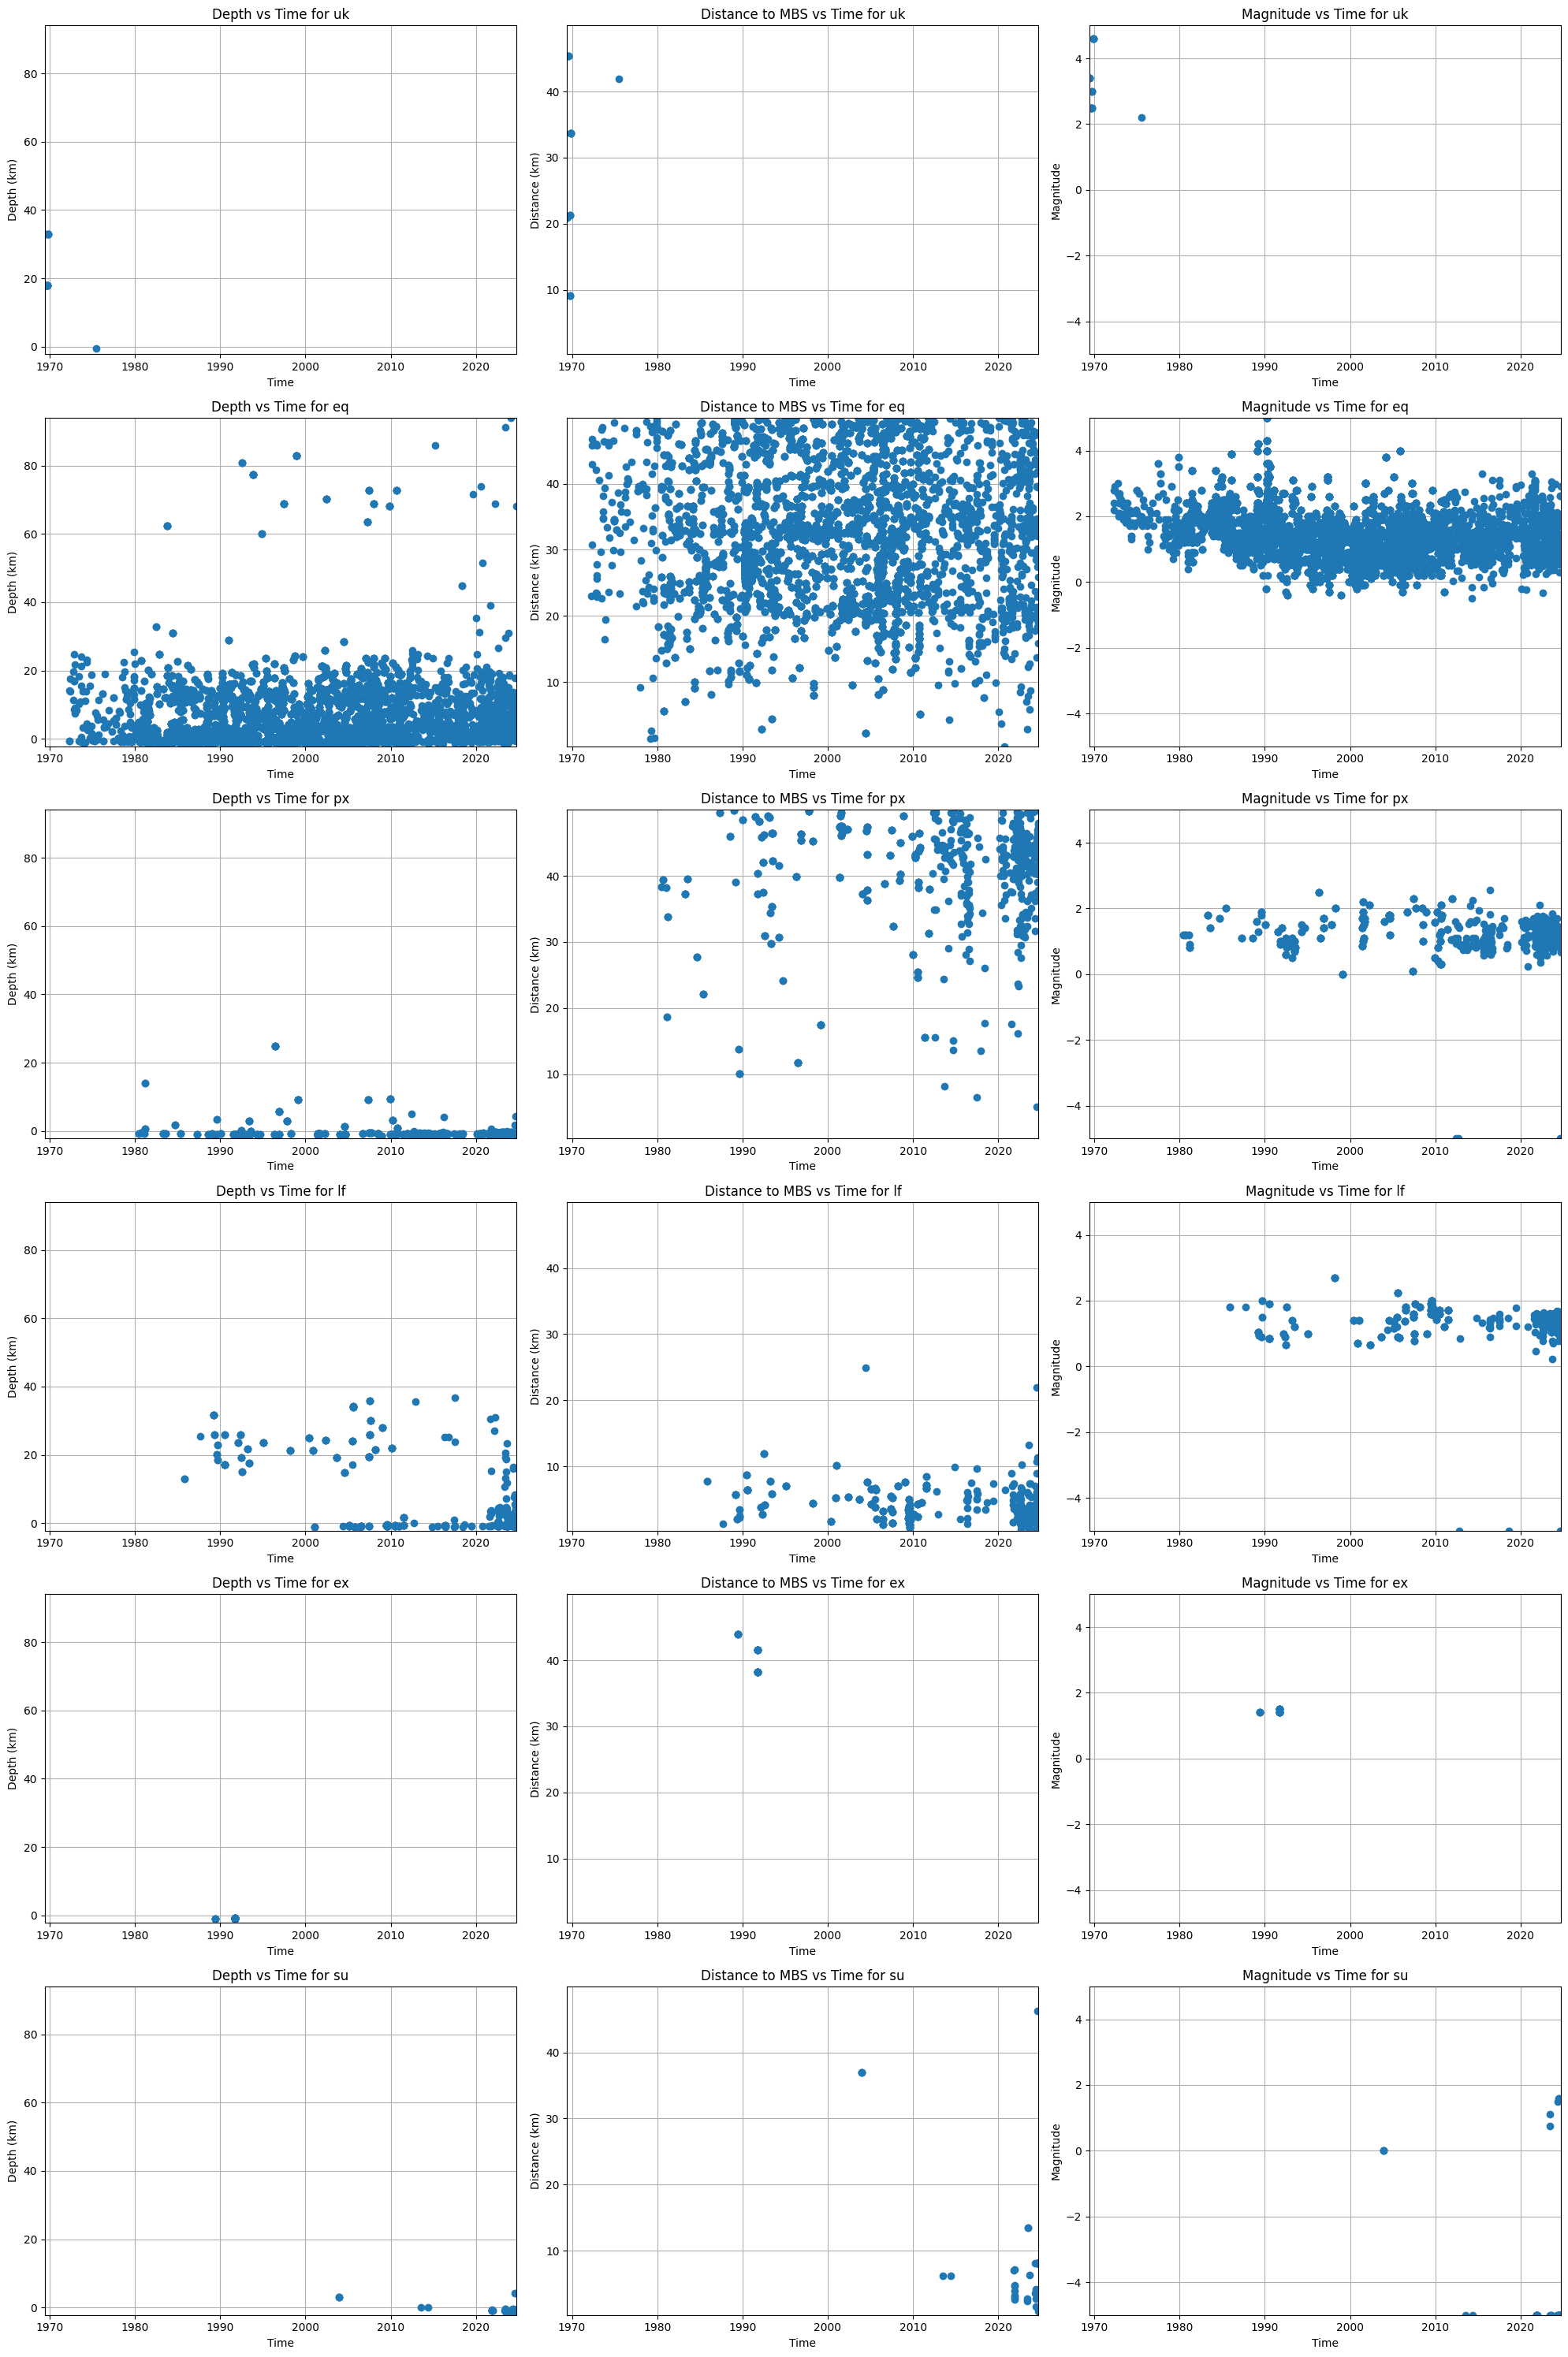

In [9]:
# create subplots
fig, axs = plt.subplots(nrows=len(event_types), ncols=3, figsize=(20, 5 * len(event_types)))

depth_min = events_df_multi_index['depth'].min()
depth_max = events_df_multi_index['depth'].max()

mbs_distance_km_min = events_df_multi_index['mbs_distance_km'].min()
mbs_distance_km_max = events_df_multi_index['mbs_distance_km'].max()

magnitude_min = events_df_multi_index['magnitude'].min()
magnitude_max = events_df_multi_index['magnitude'].max()

time_min = events_df_multi_index.index.get_level_values('origin.datetime (UTC)').min()
time_max = events_df_multi_index.index.get_level_values('origin.datetime (UTC)').max()

for i, etype in enumerate(event_types):
    subset = events_df_multi_index.xs(etype, level='etype') # xs() is cross-section. It is used to retrieve data at a specific level of a MultiIndex.

    # scatter plot for Depth
    axs[i, 0].plot(subset.index, subset['depth'],'o')
    axs[i, 0].set_title(f'Depth vs Time for {etype}')
    axs[i, 0].set_xlabel('Time')
    axs[i, 0].set_ylabel('Depth (km)')
    axs[i, 0].set_ylim(depth_min, depth_max)
    axs[i, 0].set_xlim(time_min, time_max)
    axs[i, 0].grid(True)  

    # scatter plot for Distance to Mt. Baker's Summit
    axs[i, 1].plot(subset.index, subset['mbs_distance_km'], 'o')  
    axs[i, 1].set_title(f'Distance to MBS vs Time for {etype}')
    axs[i, 1].set_xlabel('Time')
    axs[i, 1].set_ylabel('Distance (km)')
    axs[i, 1].set_ylim(mbs_distance_km_min, mbs_distance_km_max)
    axs[i, 1].set_xlim(time_min, time_max)
    axs[i, 1].grid(True)

    # scatter plot for Magnitude
    axs[i, 2].plot(subset.index, subset['magnitude'], 'o') 
    axs[i, 2].set_title(f'Magnitude vs Time for {etype}')
    axs[i, 2].set_xlabel('Time')
    axs[i, 2].set_ylabel('Magnitude')
    axs[i, 2].set_ylim(magnitude_min, magnitude_max)
    axs[i, 2].set_xlim(time_min, time_max)
    axs[i, 2].grid(True)

plt.tight_layout()
plt.show()

#### Acronym from CISN/ANSS Schema

##### Event identifier and source

`evid`: event identifier; it is possible for several records in the Origin relation to have the same evid. 

`etype`: the type of seismic event 

1. `EQ`: earthquakes

2. `PX`: probable blast

3. `SU`: surface events

4. `UK`: unknown events

5. `LF`: low-frequency seismic events

`commid`: comment identification used to point to free-form comments entered in the Remark relation.

`magtype`: 	magnitude type used to specify the type of the magnitude measure 

`uncertainty`: magnitude uncertainty

`nsta`: the number of stations with non-zero input weights used to compute the magnitude 

`nobs`: the number of observations with non-zero input weights used to compute the magnitude 

`orid`: origin identification used to identify one of the many hypotheses of the actual location of the event 

`auth`: the source of the information (i.e., a network identifier)

##### Origin

`to_timestamp`: datetime associated with information in the record, in true epoch format 

`lat`: the geographic latitude

`lon`: the geographic longitude

`depth`: distance in KM of the earthquake source below the geoid

`mbs_distance_km`: distances from Mt. Baker’s Summit (MBS)

`quality`: the quality of an origin, an arrival, or a mechanism (1.0 = good, 0.0 = bad)

`wrms`: the weighted RMS 

`erhor`: horizontal error; the location uncertainty that accompanies the location

`sdep`: depth error (the standard deviation)

`erlat`: latitude error (the standard deviation)

`erlon`: longitude error (the standard deviation)

##### Inversion

`fdepth`: this attribute indicates if the depth was fixed or not to compute the solution 
 
`fepi`: this attribute indicates if the epicenter was fixed or not to compute the solution 

`ftime`: this attribute indicates if the origin time was fixed or not to compute the solution 

##### Origin error

Elements of the covariance matrix for the location defined by orid. The covariance matrix is symmetric (and positive definite) so that sxy = syx, etc., (x, y, z, t) refer to latitude, longitude, depth and origin time, respectively. They are used to construct the K-dimensional confidence ellipse or ellipsoids at any confidence limit desired. (`sxx`,  `syy`, `szz`, `stt`, `sxy`, `sxz`, `syz`, `stx`, `sty`, `stz`)

`maglarge`: magnitude of largest principal error 

`azilarge`: azimuth of largest principal error 

`diplarge`: dip of largest principal error 

`maginter`: magnitude of intermediate principal error 

`aziinter`: azimuth of intermediate principal error 

`dipinter`: dip of intermediate principal error 

`magsmall`: magnitude of smallest principal error 

`azismall`: azimuth of smallest principal error 

`dipsmall`: dip of smallest principal error 


